# データの準備

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, '5')

Text(0.5, 1.0, '0')

Text(0.5, 1.0, '4')

Text(0.5, 1.0, '1')

Text(0.5, 1.0, '9')

Text(0.5, 1.0, '2')

Text(0.5, 1.0, '1')

Text(0.5, 1.0, '3')

Text(0.5, 1.0, '1')

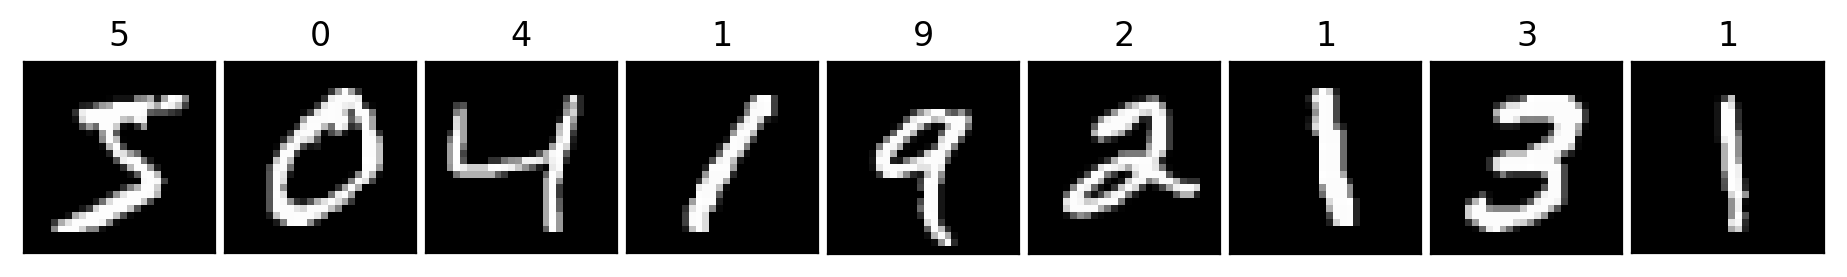

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

# 各MNIST画像の上に（タイトルとして）対応するラベルを表示
for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

In [3]:
from tensorflow.keras.utils import to_categorical

# 入力画像を行列(28x28)からベクトル(長さ784)に変換
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# 名義尺度の値をone-hot表現へ変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデル構築

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# モデルの「容器」を作成
model = Sequential()

# 「容器」へ各layer（Dense, Activation）を積み重ねていく（追加した順に配置されるので注意）
# 最初のlayerはinput_shapeを指定して、入力するデータの次元を与える必要がある
model.add(Dense(units=256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

# モデルの学習方法について指定しておく
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 9.9341 - acc: 0.3767 - val_loss: 6.8508 - val_acc: 0.5684
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 5.8224 - acc: 0.6282 - val_loss: 4.3607 - val_acc: 0.7205
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 4.3070 - acc: 0.7224 - val_loss: 3.9344 - val_acc: 0.7462
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 4.0137 - acc: 0.7422 - val_loss: 3.8401 - val_acc: 0.7522
Epoch 5/10
60000/60000 [==============================] - 2s 25us/sample - loss: 3.3667 - acc: 0.7815 - val_loss: 2.4183 - val_acc: 0.8380
Epoch 6/10
60000/60000 [==============================] - 2s 25us/sample - loss: 1.5851 - acc: 0.8909 - val_loss: 0.8889 - val_acc: 0.9329
Epoch 7/10
60000/60000 [==============================] - 2s 26us/sa

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.5938387096949568
Test accuracy:  0.9526


In [7]:
classes = model.predict(x_test, batch_size=128)

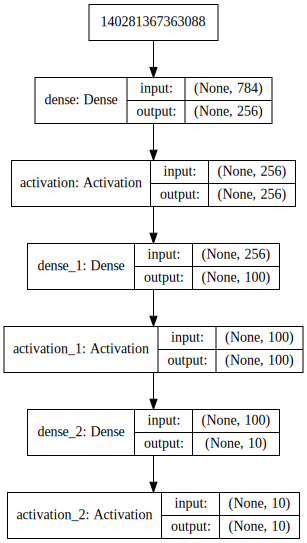

In [8]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Layer
cf
- https://keras.io/ja/layers/about-keras-layers/
- https://keras.io/ja/layers/core/

(-5, 5)

(-1.1, 2)

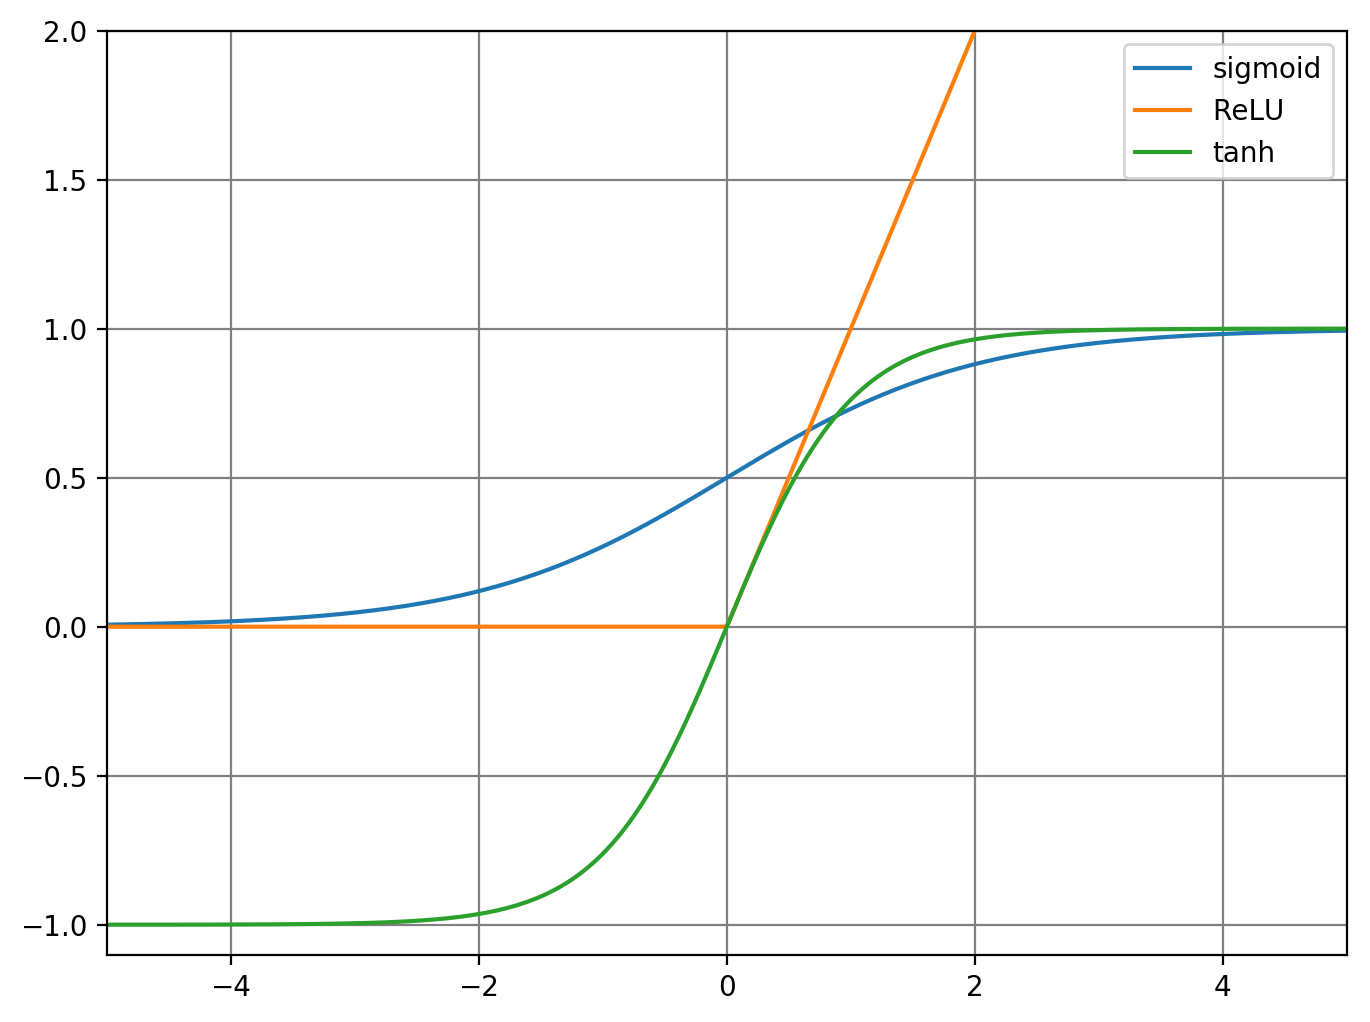

In [10]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

fig = plt.figure()
x = np.linspace(-10, 10, 1000)

ax = fig.add_subplot(111)
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, relu(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')

plt.legend()
plt.xlim(-5, 5)
plt.ylim(-1.1, 2)
plt.grid(which='major',color='gray',linestyle='-')
plt.show()

# 1.6 確認問題

1. 学習データ以外の未知のデータに対するモデルの予測性能を何というか  
  ①神通力　②バイアス　③汎化性能　④共起性
2. データセット全体を一度に全て使用して学習する方法を何というか  
  ①転移学習　②ワンショット学習　③過学習　④バッチ学習　
3. 名義尺度のデータをバイナリベクトルによって表現したものを何というか  
  ①分散表現　②one-hot表現　③ビット表現　④ユニタリ表現
4. モデルの学習に当たって最小化するものは何か  
  ①精度　②損失関数　③スコア　④F値

- - -

1. ③汎化性能　
2. ④バッチ学習　
3. ②one-hot表現
4. ②損失関数